# Scientific Methodology and Performance Evaluation project

## Purchasing power of English workers from the 16th to the 19th century

Student: Tijana Ninkovic
<br>tijana.ninkovic@grenoble-inp.org

### About the dataset
This dataset shows the evolution of the wheat price and average salaries of English workers from 1565 to 1821. The values in this dataset are obtained from a scan of William Playfair's graph. He used this graph to show the price of wheat and typical weekly wage to argue that working men had never been as well-off in terms of purchasing power as they had become towards the end of that period.
<br> This dataset is available for download on this [link](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv)

First, we are going to load the necessary libraries for analyzing and visualizing the data: `pandas`, `matplotlib` and `seaborn`.


The main library for visualizing data in Python is **matplotlib**. It is powerful enough to allow us to make any kind of graph we would like. Because it is so powerful, it is also very complex, so another library that was developed on top of it is **seaborn**. The graphs in seaborn look nicer than the ones in matplotlib and it also allows us to make complex visualizations more simple and quick. I will be using both of them in this notebook.

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

Next we are going to load the dataset, which is in a CSV format.

In [2]:
raw_data = pd.read_csv('Wheat.csv', delimiter=',')
raw_data.head()

,Unnamed: 0,Year,Wheat,Wages
0,1,1565,41.0,5.00
1,2,1570,45.0,5.05
2,3,1575,42.0,5.08
3,4,1580,49.0,5.12
4,5,1585,41.5,5.15


We are going to use the first column of the dataset as index.

In [3]:
raw_data.columns = ['Index', 'Year', 'Wheat', 'Wages']
df = raw_data.set_index('Index')
df.head()

,Year,Wheat,Wages
Index,,,
1,1565,41.0,5.00
2,1570,45.0,5.05
3,1575,42.0,5.08
4,1580,49.0,5.12
5,1585,41.5,5.15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 53
Data columns (total 3 columns):
Year     53 non-null int64
Wheat    53 non-null float64
Wages    50 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


`df.info()` gives us information about our dataset. We can see that it has 53 rows and 3 columns. Year values are integers and wheat and wages values are floats.
<br>For each row we have a number of non-null values. For Year and Wheat that number is the same as the number of rows, but we can see that for Wages we have some null values.

In [5]:
df[df.isnull().any(axis=1)]

,Year,Wheat,Wages
Index,,,
51,1815,78.0,NaN
52,1820,54.0,NaN
53,1821,54.0,NaN


We can see that the last three rows are those for which we have missing Wages values. We can exclude those rows from further analysis by removing them from our dataset.

In [6]:
df = df.drop([51,52,53])

In [7]:
df.describe()

,Year,Wheat,Wages
count,50.000000,50.000000,50.000000
mean,1687.500000,42.140000,11.581600
std,72.886899,14.879461,7.336287
min,1565.000000,26.000000,5.000000
25%,1626.250000,32.250000,6.145000
50%,1687.500000,40.250000,7.800000
75%,1748.750000,45.750000,14.875000
max,1810.000000,99.000000,30.000000


With `df.describe()` we can get some statistical information about our data, like the minimum and maximum value for each column, mean value etc. This helps us familiarize with the data we are working with.

In order to verify the data, we can check whether we have some missing data by checking the difference of Year values between each consecutive row.

In [8]:
year_list = list(df['Year'])

In [9]:
current = year_list[0]
for elem in year_list:
    assert (elem - current <= 5), "There is missing data"
    current = elem

This means that we don't have any missing data and that the difference between all our Year values is 5.

#### 1. Reproduce Playfair's graph from the numerical data

[Playfair's graph](https://upload.wikimedia.org/wikipedia/commons/3/3a/Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat%2C_and_Wages_of_Labour_by_the_Week%2C_from_1565_to_1821.png) represents the wheat price by bars and the salaries by a blue surface delimited by a red curve.

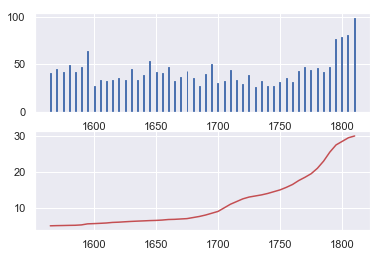

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.bar(df['Year'], df['Wheat'], edgecolor='b', width=0.8)
ax2.plot(df['Year'], df['Wages'], color='r')
plt.show()

This graph is not identical to Playfair's graph due to difference in the tools used to create them, but it shows the same data in a similar style. The wheat prices are represented by bars and the salaries are represented by a red curve.


We can see that over the years the salary has exponentially increased. The wheat prices stayed pretty much the same until the eighteenth century when they also increased drastically, but not as much as the salary, which is the point Playfair was trying to argue.

#### 2. Improve the representation of the data

This graph can be improved by adding another y-axis to separate shillings per week and shillings per quarter, because in the original graph they are looked at as the same value.

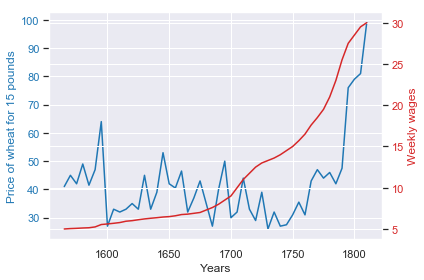

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Price of wheat for 15 pounds', color=color)
ax1.plot(df['Year'], df['Wheat'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # This means that they will share the x-axis

color = 'tab:red'
ax2.set_ylabel('Weekly wages', color=color) 
ax2.plot(df['Year'], df['Wages'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

This graph gives us a much better representation of the data. The left y-axis represents the price of wheat per quarter, a quarter being 15 pounds. The right y-axes represents the wages in shillings per week. 

However, from this graph we are still unable to conclude how much wheat a worker could buy with his salary.

#### 3. Make the fact that worker's purchasing power increased over time stand out better

We can further improve the graph by presenting the actual purchasing power, which is the amount of wheat a worker could buy with a weekly salary. To do this, we first need to calculate this value and add it to our dataset as a new column.

We begin by calculating the price of 1kg of wheat, since the current values give us the price of 15 pounds, which is 6.8kg.
We can get this value by deviding the Wheat column with 6.8.
<br>After that, we want to find how many kilograms of wheat could be bought with a weekly salary, so we devide the Wages column with the price per kilogram that we just calculated. The new value is saved in the column **Wheat for weekly salary**

In [12]:
df2 = df.copy()
df2['Wheat for weekly salary'] = round(df2['Wages']/(df2['Wheat']/6.8), 2)
df2.head()

,Year,Wheat,Wages,Wheat for weekly salary
Index,,,,
1,1565,41.0,5.00,0.83
2,1570,45.0,5.05,0.76
3,1575,42.0,5.08,0.82
4,1580,49.0,5.12,0.71
5,1585,41.5,5.15,0.84


Now, we can plot this new value we calculated as a function of time and show how the purchasing power changed over the years.

Text(0.5,1,'Amount of wheat (in kg) that can be purchased with weekly salary')

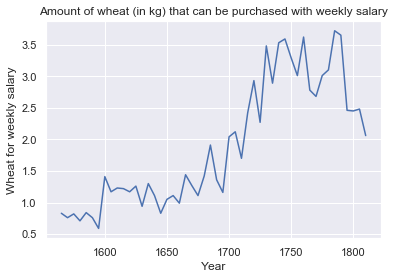

In [51]:
sns.lineplot('Year', 'Wheat for weekly salary', data=df2).set_title('Amount of wheat (in kg) that can be purchased with weekly salary')

The graph is showing us that, as Playfair claimed, the purchasing power had increased. We can see a significant increase between the years 1700 and 1750. However, by the end of the 17th century, we see a decrease.

The next task is to show the prices and salaries on the same graph. For visualizing two nummeric attributes, the scatter plot is used most often. It also allows us to add a third dimension to the graph, by changing either the size or the color of the points. Here I am using the `scatterplot()` function from the `seaborn` package and setting the value of hue to Year. Lighter points represent earlier years, while darker points represent later years.

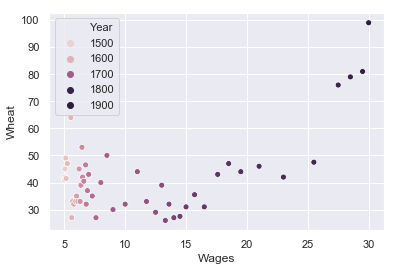

In [48]:
sns.scatterplot(x='Wages', y='Wheat', hue='Year', data=df)

From this graph we can draw a similar conclusion as before. We see that in some of the earlier years (ligher dots on the graph) the wages were quite low and the wheat prices were quite high in comparison. Then, during the 17th and 18th century we see an increase in wages which is not followed by an equal increase in wheat prices, so we conclude that the purchasing power had become much higher. Then finally towards the end of the 18th century we see a large increase in wheat prices, which corresponds to the previos graph that showed us the purchasing power decreased again.

#### Conclusion
I think that the best data representation is the third graph which shows the amount of wheat that can be bought for the weekly salary as a function of time. I think it is the most intuitive and could be easily understood by anyone, while also containting all the relevant information to draw conslusions.